# Homework 5: Numeric/Simulted Solution to Bayes' Theorem



## &emsp; $P(signal|data)=\frac {P(data|signal)P(signal)}{P(data)}$

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import random
from scipy.stats import uniform
plt.rcParams["figure.figsize"] = (15,10)

### Problem 1

In [2]:
# signal free background
mu, sigma = 0, 3.5 # mean and standard deviation
background = np.random.normal(mu, sigma, 1000000)

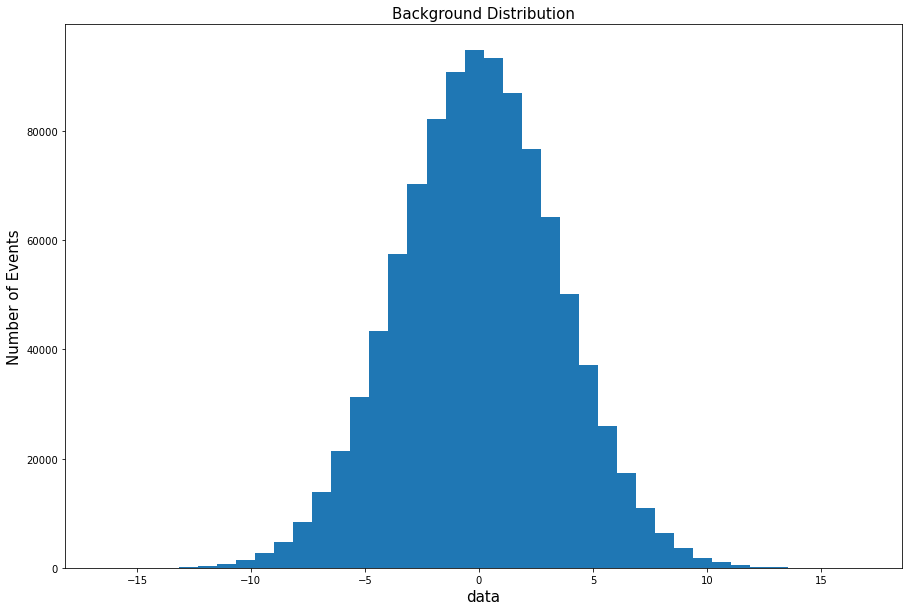

In [3]:
plt.hist(background, bins=40)
plt.title('Background Distribution',size=15)
plt.xlabel('data',size=15)
plt.ylabel('Number of Events',size=15)
plt.show()

In [4]:
fake_signal = uniform.rvs(0,20,size=1000000)

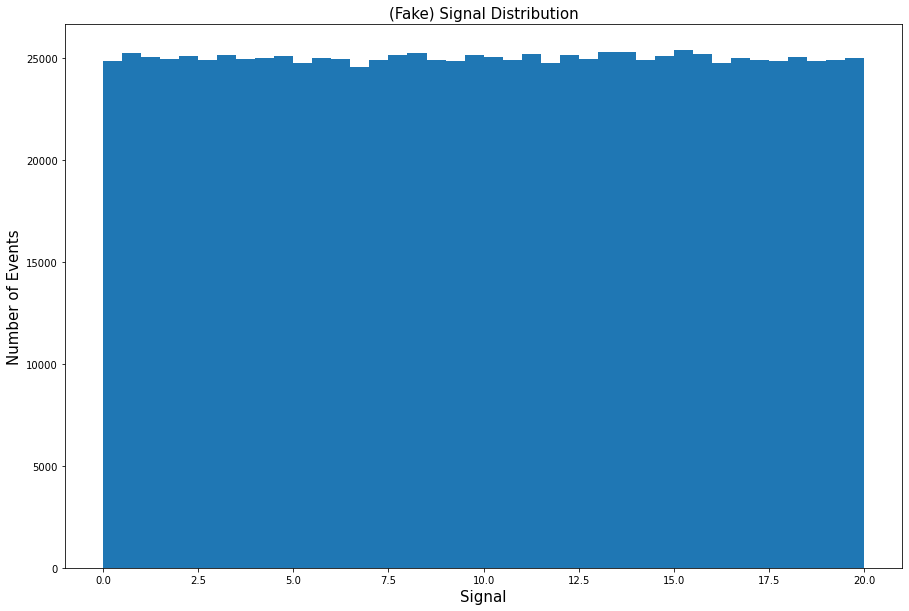

In [5]:
plt.hist(fake_signal,bins=40)
plt.title('(Fake) Signal Distribution',size=15)
plt.xlabel('Signal',size=15)
plt.ylabel('Number of Events',size=15)
plt.show()

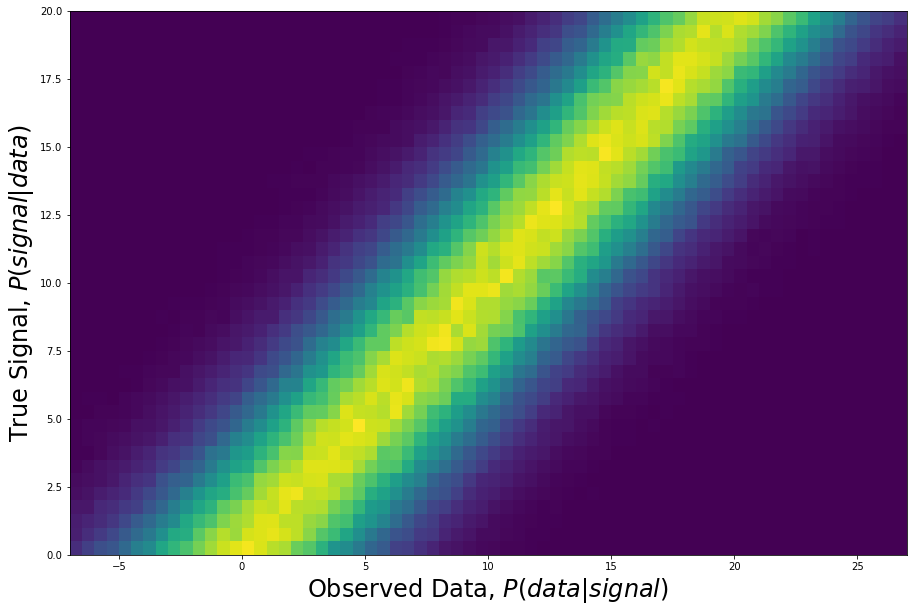

In [17]:
# adding signal to background to create fake data readings
data = background + fake_signal

signal_edges = np.linspace(0,20,41)
data_edges = np.linspace(-7,27,69)

Psd, temp, temp2= np.histogram2d(data,fake_signal, bins=[data_edges,signal_edges], density=True)

data_centers = (data_edges[:-1] + data_edges[1:]) / 2
signal_centers = (signal_edges[:-1] + signal_edges[1:]) / 2
plt.pcolormesh(data_centers,signal_centers,Psd.T,shading='auto')
plt.ylabel('True Signal, $P(signal|data)$', fontsize = 24)
plt.xlabel('Observed Data, $P(data|signal)$', fontsize = 24)
plt.show()

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

### Problem 1b
Select a true injected signal and plot  $P(data|signal)$ . (Use a stair style plot).

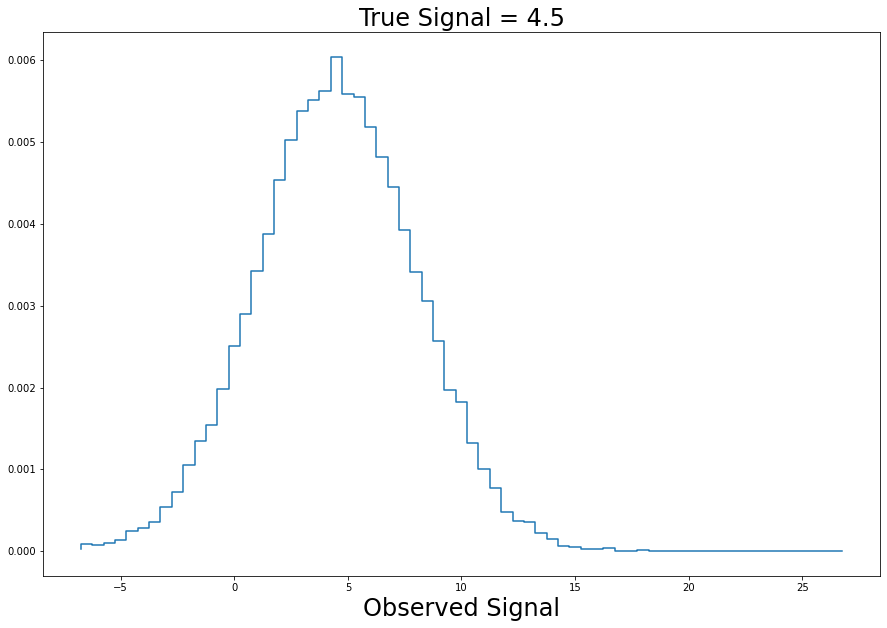

In [30]:
# choosing singal = 4.5 (index 9 on temp is 4.5)
plt.step(data_centers, Psd[:,9])
plt.title('True Signal = 4.5', fontsize = 24)
plt.xlabel('Observed Signal', fontsize = 24)
plt.show()
plt.show()

### Problem 1c
Select an observed data value and plot  $P(signal|data)$ . (Use a stair style plot).

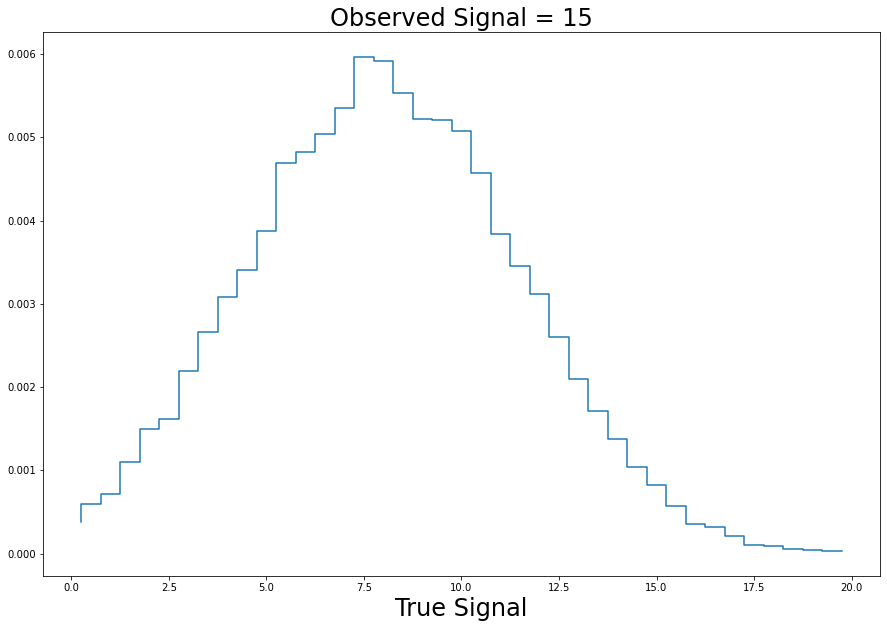

In [31]:
# choosing observed data value = 15 (index 30 on temp2 is 15)
plt.step(signal_centers, Psd[30,:])
plt.title('Observed Signal = 15', fontsize = 24)
plt.xlabel('True Signal', fontsize = 24)
plt.show()
plt.show()